In [ ]:
import tensorflow as tf
print(tf.__version__)


2.8.2


In [1]:
import os

os.chdir("/content/drive/My Drive/basicml") #更改路徑
os.getcwd()
!ls 

 ANN.ipynb		     FinalExam_Question3.ipynb
 ans_naive_bayes.csv	     kaiku
 ans_preds_ada2.csv	    'Logistic Regression.ipynb'
 ans_preds_ada3.csv	    'Metrics of Classification.ipynb'
 ans_preds_ada4.csv	    'Metrics of Regression.ipynb'
 ans_preds_ada5.csv	     ML_0308_Regressionipynb.ipynb
 ans_preds_ada6.csv	     sample_submission.csv
 ans_preds_ada.csv	    'Spaceship Titanic'
 ans_preds_bag.csv	     test.csv
 ans_preds_dt.csv	     test_set.h5
 ans_preds_rf.csv	     TQC+_MLD01_NBA三分球得球數.ipynb
 ans_preds_svm.csv	     TQC+_MLD03_波士頓房價.ipynb
 CNN.ipynb		     train.csv
'Decision Tree.ipynb'	     train_set.h5
'Example of SVM.ipynb'	     Untitled0.ipynb
 FinalExam_Question1.ipynb  'wine prediction.ipynb'


In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
import numpy as np
import h5py

def load_h5py_to_np(path, key1, key2):
    h5_file = h5py.File(path, 'r')
    permutation = np.random.permutation(len(h5_file[key2])) # 獲取序列隨機排列的副本

    shuffled_image = h5_file[key1][:][permutation, :, :, :]
    shuffled_label = h5_file[key2][:][permutation]

    return shuffled_image, shuffled_label
 
X_train, y_train = load_h5py_to_np('train_set.h5', 'X_train', 'y_train')
print(X_train.shape)
print(y_train.shape)

X_test, y_test = load_h5py_to_np('test_set.h5', 'X_test', 'y_test')
print(X_test.shape)
print(y_test.shape)

(8000, 64, 64, 3)
(8000, 1)
(2000, 64, 64, 3)
(2000, 1)


y = 0.0
255.0


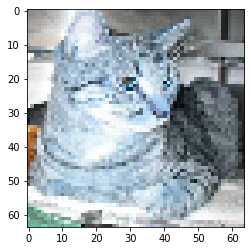

In [ ]:
import matplotlib.pyplot as plt

index = 16
plt.imshow(X_train[index].astype(int))
print("y = " + str(y_train[index, 0]))
print(np.max(X_train[index, :]))


In [ ]:
r_model = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)